In [1]:
import numpy as np
import cv2
import os
import keras
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
np.random.seed(143)

In [3]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [4]:
image_directory = "melanoma_cancer_dataset/"
SIZE = 128

In [5]:
dataset = []
label = []

In [6]:
benign = os.listdir(image_directory + 'benign/')
for i, image_name in enumerate(benign):
    if (image_name.split(".")[1] == 'jpg'):
        image = cv2.imread(image_directory + 'benign/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image)/255)
        label.append(0)

In [7]:
malignant = os.listdir(image_directory + 'malignant/')
for i, image_name in enumerate(malignant):
    if (image_name.split(".")[1] == 'jpg'):
        image = cv2.imread(image_directory + 'malignant/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image)/255)
        label.append(1)

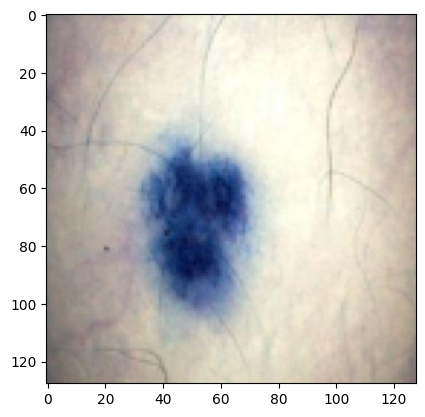

In [8]:
plt.imshow(dataset[10])
plt.show()

In [9]:
INPUT_SHAPE = (SIZE, SIZE, 3)

inp = keras.layers.Input(shape = INPUT_SHAPE)
conv1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)


In [10]:
conv2 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

In [11]:
flat = keras.layers.Flatten()(drop2)

In [12]:
hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

In [13]:
hidden2 = keras.layers.Dense(512, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)

In [14]:
model = keras.Model(inputs = inp, outputs = out)

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,055,906 (65.06 MB)

 Trainable params: 17,053,730 (65.05 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [17]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

In [18]:
#recheck imbalance

In [19]:
history = model.fit(np.array(X_train), y_train, batch_size=64, verbose=1, epochs=100, validation_split=0.1, shuffle=False)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 341ms/step - accuracy: 0.8464 - loss: 0.3775 - val_accuracy: 0.5654 - val_loss: 0.7616
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 348ms/step - accuracy: 0.8951 - loss: 0.2552 - val_accuracy: 0.5524 - val_loss: 1.0985
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 356ms/step - accuracy: 0.9138 - loss: 0.2279 - val_accuracy: 0.5630 - val_loss: 1.2738
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 361ms/step - accuracy: 0.9256 - loss: 0.1997 - val_accuracy: 0.7503 - val_loss: 0.5974
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 364ms/step - accuracy: 0.9302 - loss: 0.1910 - val_accuracy: 0.7833 - val_loss: 0.4686
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 371ms/step - accuracy: 0.9398 - loss: 0.1672 - val_accuracy: 0.8151 - val_loss: 0.4420
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - accuracy: 0.9454 - loss: 0.1524 - val_accuracy: 0.8634 - val_loss: 0.3124
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 46s 381ms/step - accuracy: 0.9507 -

In [20]:
print("Test Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9095 - loss: 0.6964
Test Accuracy: 90.43%


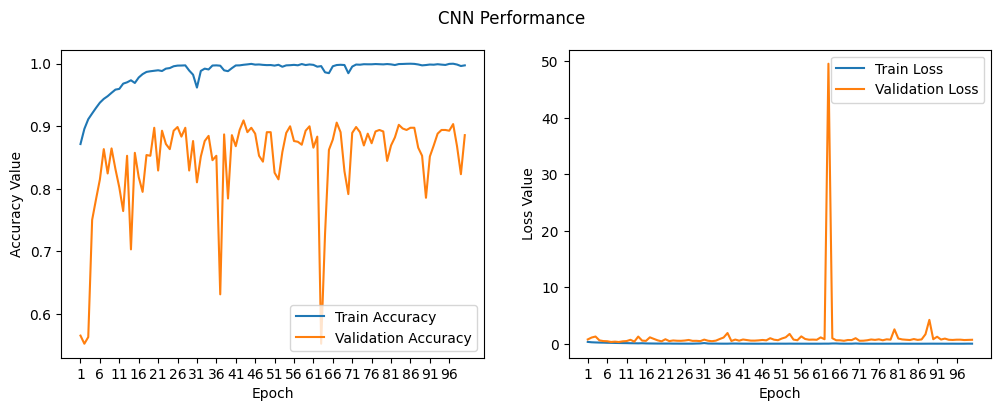

In [21]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
t = f.suptitle("CNN Performance")
max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel("Accuracy Value")
ax1.set_xlabel("Epoch")
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel("Loss Value")
ax2.set_xlabel("Epoch")
l2 = ax2.legend(loc="best")

In [22]:
#model.save('melanoma_cnn.h5')